### Feedback analysis
perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('..\..\datasets\sentiment labelled sentences\zamazon_cells_labelled.txt',sep='\t',names = ['sentence','label'] )
#yelp_labelled.txt
# amazon_cells_labelled.txt
#imdb_labelled.txt
# good excellent great must impressed love well right nice beautiful great 
# bad: bad terrible waste misleading unusable  poor garbage disappointed worthless fooled suddenly

In [13]:
df['label'] = (df['label'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.
df.head(3)
df['label'].sum()

500

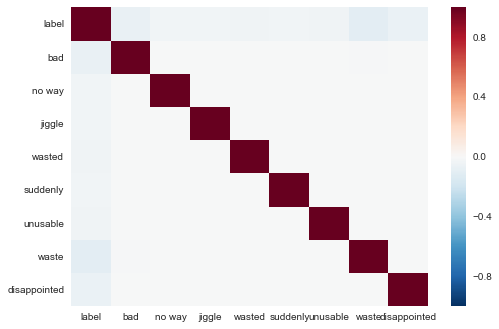

In [7]:

dt=df.drop(['sentence'],axis=1)

sns.heatmap(dt.corr())


In [60]:
def classify(df, keywords, label_column):

    for key in keywords:
        # Note that we add spaces around the key so that we're getting the word,
        # not just pattern matching.
        df[str(key)] = df.sentence.str.contains(
            str(key) ,
        case=False
    )    
    data = df[keywords]
    target = df[label_column]
    # Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    missed=((target != y_pred)&(target==False)).sum()
    false_alert=((target != y_pred)&(target==True)).sum()
    # Display our results.
    print("Number of mislabeled points out of a total cases {},  : {} , missed {} , false_alert {} ".format(
       data.shape[0], 
       (target != y_pred).sum(), missed, false_alert
    ))
    

In [146]:
df['sentence'].tail(105)

895                 it was quite comfortable in the ear.
896                                         great phone.
897                  don't buy this product - it fails!.
898         everything about this product is wrong.first
899    the pairing of the two devices was so easy it ...
900    this was utterly confusing at first, which cau...
901                               terrible phone holder.
902        the cutouts and buttons are placed perfectly.
903    i love being able to use one headset for both ...
904    problem is that the ear loops are made of weak...
905    not nearly as good looking as the amazon pictu...
906    but despite these few flaws, this case is of e...
907                                  how stupid is that?
908    i can hear while i'm driving in the car, and u...
909    seller shipped quickly and much cheaper than t...
910                                  good show, samsung.
911    so i bought about 10 of these and saved alot o...
912    it always cuts out and m

In [198]:

#
bad_keywords = ['bad','never','poor','wrong','if','doesn','didn','only','return','however','problem','does not','unusable','disappoint','unsatisfac','junk']
print(list(df))
df['sentence']=df['sentence'].str.lower()
classify(df,bad_keywords,'label')

['sentence', 'label', 'bad', 'no way', 'jiggle', 'wasted', 'suddenly', 'unusable', 'waste', 'disappointed', 'unsatisfactory', 'junk', 'negative', 'does not', 'hard', 'flops', 'disappoint', '', 'tricky', 'problem', 'misleading', 'fall', 'never', 'return', 'however', 'blew', 'only', 'lousy', 'refund', 'one', 'unsatisfac', 'cannot', 'breaks', 'not be', 'fool', 'need', 'if', 'doesn', 'garbage', 'worthless', 'not impressed', 'who', 'poor', 'didn', 'had to', 'couldnnot impressed', 'couldn', 'wrong', 'but', 'couln']
Number of mislabeled points out of a total cases 1000,  : 361 , missed 317 , false_alert 44 


###### second dataset





In [72]:
dm=pd.read_csv('..\..\datasets\sentiment labelled sentences\yelp_labelled.txt',sep='\t' ,names= ['sentence','label'])
dm['label'] = (dm['label'] == 1)

In [144]:
dm['sentence'].tail(85)

915    the only thing i wasn't too crazy about was th...
916    there is really nothing for me at postinos, ho...
917             i got food poisoning here at the buffet.
918    they brought a fresh batch of fries and i was ...
919    what should have been a hilarious, yummy chris...
920    needless to say, i won't be going back anytime...
921                            this place is disgusting!
922    every time i eat here, i see caring teamwork t...
923                    the ri style calamari was a joke.
924    however, there was so much garlic in the fondu...
925    i could barely stomach the meal, but didn't co...
926    it was so bad, i had lost the heart to finish it.
927    it also took her forever to bring us the check...
928    we aren't ones to make a scene at restaurants ...
929                            disappointing experience.
930    the food is about on par with denny's, which i...
931    if you want to wait for mediocre food and down...
932     waaaaaayyyyyyyyyy over 

In [173]:
bad_keywords = ['couldn','suck','wasn','aren','lack','avoid','flop','bad','worst','did not','horrible','never','however','problem','disgust','fall','unusable','waste','disappoint','unsatisfact','junk','negative','slow','worth']
dm['sentence']=dm['sentence'].str.lower()
classify(dm,bad_keywords,'label')

Number of mislabeled points out of a total cases 1000,  : 372 , missed 355 , false_alert 17 


In [152]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
data=df.drop(['sentence','label'],axis=1)
target=df['label']
y_pred = bnb.fit(data, target).predict(data)]
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.7 , 0.63, 0.71, 0.63, 0.71, 0.58, 0.61, 0.59, 0.63, 0.75])

In [171]:
data=dm.drop(['sentence','label'],axis=1)
target=dm['label']
y_pred = bnb.fit(data, target).predict(data)
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.66, 0.61, 0.67, 0.55, 0.6 , 0.57, 0.58, 0.61, 0.62, 0.68])

In [200]:
# holdout: train/ validation / test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.6
Testing on Sample: 0.634
